In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import datasets
table_1 = pd.read_csv('page_level_data-1-2018.csv')
table_2 = pd.read_csv('page_level_data-1-2019.csv')
table_3 = pd.read_csv('page_level_data-2-2018.csv')
table_4 = pd.read_csv('page_level_data-2-2019.csv')
table_5 = pd.read_csv('page_level_data-3-2018.csv')
table_6 = pd.read_csv('page_level_data-3-2019.csv')
table_7 = pd.read_csv('page_level_data-4-2018.csv')
table_8 = pd.read_csv('page_level_data-4-2019.csv')
table_9 = pd.read_csv('page_level_data-5-2018.csv')
table_10 = pd.read_csv('page_level_data-5-2019.csv')
table_11 = pd.read_csv('page_level_data-6-2018.csv')
table_12 = pd.read_csv('page_level_data-6-2019.csv')
table_13 = pd.read_csv('page_level_data-7-2018.csv')
table_14 = pd.read_csv('page_level_data-7-2019.csv')
table_15 = pd.read_csv('page_level_data-8-2018.csv')
table_16 = pd.read_csv('page_level_data-8-2019.csv')
table_17 = pd.read_csv('page_level_data-9-2018.csv')
table_18 = pd.read_csv('page_level_data-9-2019.csv')
table_19 = pd.read_csv('page_level_data-10-2018.csv')
table_20 = pd.read_csv('page_level_data-11-2018.csv')
table_21 = pd.read_csv('page_level_data-12-2018.csv')
cpm = pd.read_csv('cpm_estimates.csv')

In [3]:
# combine datasets
PageTotal = table_1.append([table_2,table_3,table_4,table_5,table_6,table_7,table_8,table_9,
                           table_10,table_11,table_12,table_13,table_14,table_15,table_16,
                           table_17,table_18,table_19,table_20,table_21])

In [74]:
#get the total value of different page
value = PageTotal.groupby(['hID'])['value'].sum().reset_index(name='total_value')
#top 20 page ID 
top_20 = value.sort_values('total_value',ascending = False)
top_20=top_20.head(20)
top_20

,hID,total_value
507,5985496763413417965,2.544661e+11
83,-6476587581001704713,1.791408e+11
280,-611461754330126857,1.407804e+11
278,-677096669019753926,1.066575e+11
270,-787584814991501941,1.064504e+11
200,-2773857506371655539,9.404937e+10
531,6846896287552541996,7.983576e+10
430,3501369517376478762,7.629627e+10
139,-4902185222264409139,7.455857e+10
469,4722323990490306917,6.038427e+10


Text(0, 0.5, 'Value')

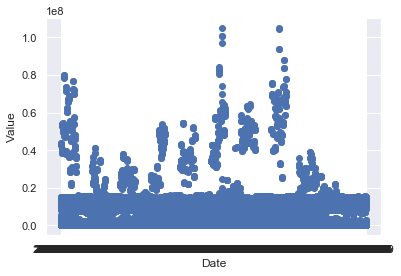

In [32]:
#plot of toppest page ID: 5985496763413417965(account name: MTV ) from 01/2018 to 09/2019.

top_1 = PageTotal[PageTotal['hID'] == 5985496763413417965]
plt.scatter(top_1['date'],top_1['value'])
plt.xlabel('Date')
plt.ylabel('Value')

In [73]:
#cpm for different account and top 20
cpm.head()
cpm_1 = cpm.groupby(['account_name','hID'])['cpm'].sum().reset_index(name='total_cpm')
cpm_20 = cpm_1.sort_values('total_cpm',ascending = False)
cpm_20 =cpm_20.head(20)
cpm_20

,account_name,hID,total_cpm
98,TV Land,-1394022326274885364,47595.681783
122,VH1,2781297351297766016,47143.365274
18,CMT,-4967663773220953610,46853.845979
57,MTV,5985496763413417965,45938.996051
77,Nickelodeon,3688333473837668933,39792.790916
22,Comedy Central,4702249124225659102,29060.077534
55,Logo,8612360243796749724,27580.249530
82,Paramount Network,9078619956980182058,14259.974537
10,BET,4722323990490306917,9165.283190
110,The Hills,4007027643175942434,1555.164701


In [72]:
#join two top cpm and top value tables(tables have high cpm and high value)
table = pd.merge(cpm_20,top_20,how='inner')
table.head(20)

,account_name,hID,total_cpm,total_value
0,VH1,2781297351297766016,47143.365274,3.459997e+10
1,MTV,5985496763413417965,45938.996051,2.544661e+11
2,Comedy Central,4702249124225659102,29060.077534,5.793221e+10
3,BET,4722323990490306917,9165.283190,6.038427e+10
